In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
points = [(2,0), (6,0), (6,2), (8,2), (8,5), (5,5), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

In [44]:
def generateAllBoundaryPoints(points):
    # find the point with the lowest y-coordinate and the lowest x-coordinate
    border = []
    # print(points)
    starting_point = points[0]
    border.append(starting_point)
    current_point = points[0]
    next_point = points[1]
    i = 1
    while (next_point != starting_point):
        # print("Staring from: ", current_point, "To: ", next_point)
        while( current_point != next_point):
            # print(current_point[0]==next_point[0], current_point[1]==next_point[1], current_point[0], next_point[0], current_point[1], next_point[1])
            if(current_point[0]==next_point[0]):
                if(current_point[1]<next_point[1]):
                    current_point = (current_point[0], current_point[1]+1)
                else:
                    current_point = (current_point[0], current_point[1]-1)
            elif(current_point[1]==next_point[1]):
                if(current_point[0]<next_point[0]):
                    current_point = (current_point[0]+1, current_point[1])
                else:
                    current_point = (current_point[0]-1, current_point[1])
            # print("Adding point: ", current_point)
            border.append(current_point)
        if(current_point == next_point):
            # print("Boundary break: ", next_point)
            i += 1
            if(i < len(points)):
                next_point = points[i]
            else:
                # mssing points bettween next_point and starting_point
                # print("mssing points bettween ",next_point ,"and", starting_point)
                if(next_point[0]==starting_point[0]):
                    if(next_point[1]<starting_point[1]):
                        next_point = (next_point[0], next_point[1]+1)
                    else:
                        next_point = (next_point[0], next_point[1]-1)
                elif (next_point[1]==starting_point[1]):
                    if(next_point[0]<starting_point[0]):
                        next_point = (next_point[0]+1, next_point[1])
                    else:
                        next_point = (next_point[0]-1, next_point[1])
                else:
                    next_point = starting_point
    return border

def verifyLineLength(x1, y1, points, edge_x, edge_y, bounrday):
    if not ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1]):
        return []
    if (x1, y1) not in bounrday:
        return []
    if (x1, y1) in bounrday and len(points) > 0:
        points.append((x1, y1))
    return points

def checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
    return ((x1, y1) not in bounrday ) and ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1])

def drawInnerLine(point, bounrday, edge=((0,10), (0,10)), flow="r"):
    x = point[0]
    y = point[1]
    points = []
    edge_x = edge[0]
    edge_y = edge[1]
    if(flow == "r"):
        x1, y1 = x+1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1+1, y1
    elif(flow == "l"):
        x1, y1 = x-1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1-1, y1
    elif(flow == "u"):
        x1, y1 = x, y-1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1-1
    elif(flow == "d"):
        x1, y1 = x, y+1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1+1
    else:
        return []
    
    points = verifyLineLength(x1, y1, points, edge_x, edge_y, bounrday)
    allinBoundary = True
    for p in points:
        if p not in bounrday:
            # print(p, " is not in boundary")
            allinBoundary = False
            break
    if(allinBoundary):
        return []

    return points

def isInLineList(line, lineList):
    if line in lineList:
        return True
    tmp_line = [ line[1], line[0] ]
    if tmp_line in lineList:
        return True
    return False

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        print("a: ", a, "b: ", b, a[0] * b[1] - a[1] * b[0])
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return False

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return int(x), int(y)


def checkAndAppend(inner_points, intersection_point, cut_lines):
    if len(inner_points) > 0:
        tmp_p = [intersection_point, inner_points[-1]]

        for index in range(len(cut_lines)):
            cut_line = cut_lines[index]
            print(str(index)+" - ", cut_lines[index])
            print(tmp_p, cut_line)
            line_cross =  line_intersection(tmp_p, cut_line)
            print(tmp_p, "", cut_line, " line_cross: ", line_cross, line_cross is not False)
            # if line_cross is not False:
                
            #     cut_line_1 = [cut_line[0], line_cross]
            #     cut_line_2 = [line_cross, cut_line[1]]
            #     print("cut_line_1: ", cut_line_1, "cut_line_2: ", cut_line_2)
            #     tmp_p_1 = [intersection_point, line_cross]
            #     tmp_p_2 = [line_cross, tmp_p]
            #     print("tmp_p_1: ", tmp_p_1, "tmp_p_2: ", tmp_p_2)
                
            # TODO : break the line into two lines

        if(not isInLineList(tmp_p, cut_lines)):
            print(cut_lines)
            cut_lines.append([intersection_point, inner_points[-1]])
        
    return cut_lines

def findCutLines(points, edge):
    bounrday = generateAllBoundaryPoints(points)
    start_point = points[0]
    previous_line = None
    cut_lines = []
    for index in range(len(points)):
        x =  points[index]
        if(index >= len(points)-1):
            y = points[0]
        else:
            y = points[index+1]
        if previous_line is None:
            previous_line = [x, y]
        else:
            next_line = [previous_line[1], y]
            intersection_point = previous_line[1]
            # check right side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="r")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check left side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="l")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check top side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="u")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check bottom side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="d")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            
            previous_line = next_line    
    return cut_lines

[]
0 -  [(6, 2), (2, 2)]
[(6, 2), (6, 7)] [(6, 2), (2, 2)]
a:  (0, 4) b:  (-5, 0) 20
a:  (6, 2) b:  (6, 7) 30
a:  (6, 2) b:  (2, 2) 8
a:  (30, 8) b:  (0, 4) 120
a:  (30, 8) b:  (-5, 0) 40
[(6, 2), (6, 7)]  [(6, 2), (2, 2)]  line_cross:  (6, 2) True
[[(6, 2), (2, 2)]]
0 -  [(6, 2), (2, 2)]
[(7, 5), (0, 5)] [(6, 2), (2, 2)]
a:  (7, 4) b:  (0, 0) 0
[(7, 5), (0, 5)]  [(6, 2), (2, 2)]  line_cross:  False False
1 -  [(6, 2), (6, 7)]
[(7, 5), (0, 5)] [(6, 2), (6, 7)]
a:  (7, 0) b:  (0, -5) -35
a:  (7, 5) b:  (0, 5) 35
a:  (6, 2) b:  (6, 7) 30
a:  (35, 30) b:  (7, 0) -210
a:  (35, 30) b:  (0, -5) -175
[(7, 5), (0, 5)]  [(6, 2), (6, 7)]  line_cross:  (6, 5) True
[[(6, 2), (2, 2)], [(6, 2), (6, 7)]]
0 -  [(6, 2), (2, 2)]
[(7, 5), (7, 2)] [(6, 2), (2, 2)]
a:  (0, 4) b:  (3, 0) -12
a:  (7, 5) b:  (7, 2) -21
a:  (6, 2) b:  (2, 2) 8
a:  (-21, 8) b:  (0, 4) -84
a:  (-21, 8) b:  (3, 0) -24
[(7, 5), (7, 2)]  [(6, 2), (2, 2)]  line_cross:  (7, 2) True
1 -  [(6, 2), (6, 7)]
[(7, 5), (7, 2)] [(6, 2), (6, 

<Figure size 432x288 with 0 Axes>

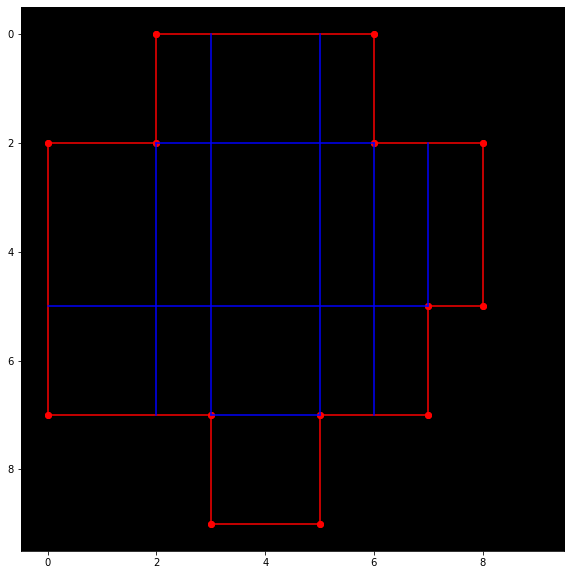

In [45]:

# create a blank image of size 100x100
img = np.zeros((10,10,3), np.uint8)
plt.clf()
fig = plt.figure(figsize=(10, 10))
color =  (255, 0, 0)

start_point = points[0]
previous_line = None
    
edge_x = (0, 9)
edge_y = (0, 9)
edge = (edge_x, edge_y)

cut_lines = findCutLines(points, edge)

for index in range(len(points)):
    x =  points[index]
    if(index >= len(points)-1):
        y = points[0]
    else:
        y = points[index+1]
    x_values = [x[0], y[0]]
    y_values = [x[1], y[1]]
    plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

for cut_line in cut_lines:
    x_values = [cut_line[0][0], cut_line[1][0]]
    y_values = [cut_line[0][1], cut_line[1][1]]
    plt.plot(x_values, y_values, color="b", marker="", linestyle="-")

plt.imshow(img)

In [25]:
cut_lines

[[(6, 2), (2, 2)],
 [(6, 2), (6, 7)],
 [(7, 5), (0, 5)],
 [(7, 5), (7, 2)],
 [(5, 7), (3, 7)],
 [(5, 7), (5, 0)],
 [(3, 7), (3, 0)],
 [(2, 2), (2, 7)]]

In [6]:
# dividing cutlines by horizontal or vertical
h_cut_lines = []
v_cut_lines = []
for cut_line in cut_lines:
    if(cut_line[0][0]==cut_line[1][0]):
        # making vetical cuts from top to bottom
        if(cut_line[0][1] < cut_line[1][1]):
            v_cut_lines.append(cut_line)
        else:
            v_cut_lines.append([cut_line[1], cut_line[0]])
    else:
        # making horizontal cuts from left to right
        if(cut_line[0][0] < cut_line[1][0]):
            h_cut_lines.append(cut_line)
        else:
            h_cut_lines.append([cut_line[1], cut_line[0]])

NameError: name 'cut_lines' is not defined

In [7]:
v_extended_poiunts = []
h_extended_poiunts = []
# v_cut_line = v_cut_lines[0]
for v_cut_line in v_cut_lines:
    current_p = list(v_cut_line[0])
    tmp_ps = []
    tmp_ps.append(list(current_p))
    while (current_p[1] < v_cut_line[1][1]):
        current_p[1] = current_p[1]+1
        tmp_ps.append(list(current_p))
    v_extended_poiunts.append(list(tmp_ps))

for h_cut_line in h_cut_lines:
    current_p = list(h_cut_line[0])
    tmp_ps = []
    tmp_ps.append(list(current_p))
    while (current_p[0] < h_cut_line[1][0]):
        current_p[0] = current_p[0]+1
        tmp_ps.append(list(current_p))
    h_extended_poiunts.append(list(tmp_ps))


In [7]:
v_extended_poiunts

[[[6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7]],
 [[7, 2], [7, 3], [7, 4], [7, 5]],
 [[5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7]],
 [[3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7]],
 [[2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7]]]

In [8]:
h_extended_poiunts

[[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2]],
 [[0, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5]],
 [[3, 7], [4, 7], [5, 7]]]

In [9]:
v_cut_lines

[[(6, 2), (6, 7)],
 [(7, 2), (7, 5)],
 [(5, 0), (5, 7)],
 [(3, 0), (3, 7)],
 [(2, 2), (2, 7)]]

In [10]:
h_cut_lines

[[(2, 2), (6, 2)], [(0, 5), (7, 5)], [(3, 7), (5, 7)]]

# Genetic Algorithm to find optimal cut lines

**_fitness_function( cut_lines )_{**
- boxes =  make_boxes(cut_lines) 
- sum_of_lines = sum_of_cut_line_lenght(cut_lines)
- count_boxes = len(boxes)
- return sum_of_lines+count_boxes
**}**


**_make_boxes( cut_lines )_{**
- calculate the boxes that donot overlap with one another with the available cut_lines
- return array_of_boxes
**}**

**_selection_function( boxes, scores )_{**
- sort the boxes with respentive to scores
- array_of_boxes = take first two who has the lowest score
- return array_of_boxes or selected_cut_lines
**}**

**_cross_over_function( selected_cut_lines )_{**
- selected_cut_lines = [ 
        [1,0,1,0,1,1,0,1], 
        [1,0,0,1,0,1,1,1] 
    ]
- box1 = [1,0,1,0, **1,1,0,1** ]
- box2 = [1,0,1,0, **0,1,1,1** ]

- box1' = [1,0,1,0, **0,1,1,1** ]
- box2' = [1,0,1,0, **1,1,0,1** ]

- cross_over =  [
        box1',
        box2'
    ], 
- return cross_overed_genes
**}**


**_mutation_function( selected_cut_lines )_{**
- change in random place
- selected_cut_lines = [1,0,1,0,1,1,0,1]
- mutated_cut_lines = [1,**1**,1,0,**0**,1,0,**0**]
- return mutated_cut_lines
**}**

